In [1]:
import numpy as np
import scipy.stats as st
import numpy.random as npr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import array
%matplotlib inline
import seaborn as sns
import numpy as np
import array
differences = np.zeros(7000)

In [2]:
df = pd.read_csv("/content/test.csv")
df

,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,0,120,284,27,62,100,False
1,1,113,282,33,64,135,False
2,2,128,279,28,64,115,True
3,3,108,282,23,67,125,True
4,4,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1169,113,275,27,60,100,False
1170,1170,128,265,24,67,120,False
1171,1171,130,291,30,65,150,True
1172,1172,125,281,21,65,110,False


In [3]:
smoking_and_Age = df[['Maternal Smoker', 'Maternal Age']]
smoking_and_Age

,Maternal Smoker,Maternal Age
0,False,27
1,False,33
2,True,28
3,True,23
4,False,25
...,...,...
1169,False,27
1170,False,24
1171,True,30
1172,False,21


In [4]:
smoker = smoking_and_Age['Maternal Age'] [smoking_and_Age['Maternal Smoker'] == True]
smoker

2       28
3       23
8       30
10      32
11      23
        ..
1162    28
1163    29
1164    21
1165    30
1171    30
Name: Maternal Age, Length: 459, dtype: int64

In [5]:
non_smoker = smoking_and_Age['Maternal Age'] [smoking_and_Age['Maternal Smoker'] == False]
non_smoker

0       27
1       33
4       25
5       33
6       23
        ..
1168    27
1169    27
1170    24
1172    21
1173    38
Name: Maternal Age, Length: 715, dtype: int64

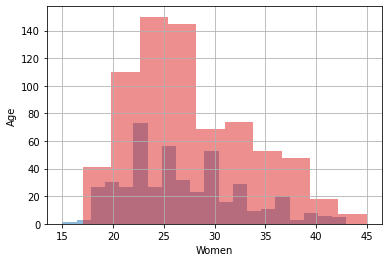

In [6]:
smoker.hist(histtype='stepfilled', alpha=.5, bins=20)
non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("red", .75), bins=10)
plt.xlabel('Women')
plt.ylabel('Age')
plt.show()

1Q) We can observe that the histogram plot of the age of the maternal smoking women is only slightly to the left to hist plot of non-smoking women

2Q) Here, we are using AB testing and difference between both the distributions can be considered as best way to find how much difference is present between both the observations, by which we can come to an conclusion

3Q) Null Hypothesis: The distribution of Age of mothers who smoke is the same for mothers who don't smoke.

Alternative Hypothesis: The distribution of Age of mothers who smoke is less than the mothers who don't smoke

4Q) Here, by the given problem statement we can say that finding the difference of the mean of distrbutions can help us in knowing if there is any difference between smoking mothers and non smoking mothers

In [7]:
mean_table = smoking_and_Age.groupby('Maternal Smoker').mean()

In [8]:
mean_table

,Maternal Age
Maternal Smoker,
False,27.544056
True,26.736383


In [9]:
#5
observed = mean_table['Maternal Age'][1] - mean_table['Maternal Age'][0]
observed

-0.8076725017901509

In [10]:
#6
for i in np.arange(5000):
    smoking_and_Age = df[['Maternal Smoker', 'Maternal Age']]
    shuffled = smoking_and_Age.sample(1174,replace = False)
    weights = shuffled['Maternal Age']
    original_and_shuffled = smoking_and_Age.assign(weights=weights.values )
    all_group_means= original_and_shuffled.groupby('Maternal Smoker').mean()
    diff = all_group_means['weights'][0]- all_group_means['weights'][1]
    differences[i] = diff
differences

array([ 0.26393041, -0.10452641, -0.21899843, ...,  0.        ,
        0.        ,  0.        ])

In [11]:
shuffled = smoking_and_Age.sample(1174,replace = False)
shuffled

,Maternal Smoker,Maternal Age
1050,False,35
1161,True,23
890,False,20
542,False,25
674,False,27
...,...,...
202,False,28
241,False,22
746,False,29
889,False,43


In [12]:
shuffled_smoker = shuffled['Maternal Age'] [shuffled['Maternal Smoker'] == True]
shuffled_smoker

1161    23
84      22
520     30
524     36
703     22
        ..
216     33
467     29
781     33
445     24
37      27
Name: Maternal Age, Length: 459, dtype: int64

In [13]:
shuffled_non_smoker = shuffled['Maternal Age'] [shuffled['Maternal Smoker'] == False]
shuffled_non_smoker

1050    35
890     20
542     25
674     27
566     24
        ..
202     28
241     22
746     29
889     43
675     22
Name: Maternal Age, Length: 715, dtype: int64

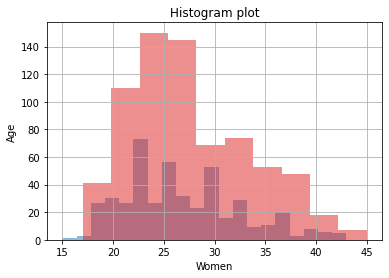

In [14]:
#7
shuffled_smoker.hist(histtype='stepfilled', alpha=.5, bins=20)
shuffled_non_smoker.hist(histtype='stepfilled', alpha=.5, color=sns.desaturate("red", .75), bins=10)
plt.xlabel('Women')
plt.ylabel('Age')
plt.title('Histogram plot')
plt.show()

In [16]:
#8
np.count_nonzero(differences <= observed)/differences.size

0.007571428571428572

9Q)
We can observe that the value of non smoking mother is a bit to left and p value is less. We can say that the Null hypothesis is rejected